# <center> TRABAJO

<div style="padding:10px; border-radius:10px; border:2px solid #4BACC6; background:#EEEEEE">
<span style="color:#4BACC6" >
    <h3>Integrantes:</h3>
    <h4>
    Juan Pablo Chaves Morales <br>
    Oscar Eduardo Correcha Guzman <br>
    Alejandro Mejia Osorio <br>
    Juan Manuel Montoya Mesa <br>
    Santiago Campos Giraldo
    </h4></div>
    </span>


## Analisis previo: 

Inicialmente se contaba con 1089 imagenes correspondientes a 10 categorias, 9 defectos y 1 donde los granos de cafe buenos.

Se retiraron las categorias donde se tenian menos de 50 imagenes, y hacer un muestreo sobre las categorias que se contaban con mas de 200 imagenes para tratar de balancear el dataset caffe. Las imagenes repartidas de la siguiente manera.

    * 72 Arrugados.
    * 90 Broca.
    * 191 Buenos.
    * 200 Decolorados.
    * 200 Inmaduro.
    * 123 Mordido.
    * 101 Negro.
    * 113 Vinagre.

Inicialmente se tenia la idea de realizar un modelo de redes neuronales convolucionales CNN, pero por la baja cantidad de imagenes se penso tambien ajustar un modelo de machine learning ML que no demandara tantas imagenes. Para el ajuste de la CNN se uso Keras y para los modelos de ML se uso Sklearn. 

## Pasos de desarrollo:

1. Solucion Modelo CNN

    1. Importar librerías
    2. Aplicacion del algoritmo gaussian_noise
    3. Cargar todas las imágenes a la memoria (se uso PC)
    4. Crear dinámicamente las etiquetas de resultado (etiquetado)
    5. Dividir en sets de Entrenamiento, Validación y Test
    6. Crear el modelo de la CNN
    7. Entrenamiento de la CNN
    8. Resultados
 
2. Solucion Modelos ML

    1. Importar librerías
    2. Cargar las  imágenes a la memoria (se uso PC)
    3. Crear dinámicamente las etiquetas de resultado (etiquetado)
    4. Creacion del DataFrame donde se almacenan las imagenes
    5. Dividir en sets de Entrenamiento, Test
    6. Entrenamiento de ML
    7. Resultados. 
    
3. Comparacion y conclusion    


# <center> Desarrollo

## 1. Solucion Modelo CNN

###  1. Importar librería

In [42]:
# Carga de Librerias

import numpy as np
import os
import re
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.vis_utils import plot_model
from keras import regularizers

In [75]:
# Funciones auxiliares

def evaluate_model(y_test, y_pred, model = None):
    """
    Aqui se pondran las cuatro metricas que se piden en el reporte
    debido a que cada modelo requiere las mismas metricas es probable que se pueda ejecutar el mismo para todas
    """
    f1 = print('El f1 score es de: ', f1_score(y_test, y_pred, average = 'weighted'))
    acc = print('El acc score es de: ', accuracy_score(y_test, y_pred))
    ps = print('La precision es de: ', precision_score(y_test, y_pred, average = 'micro'))
    re = print('El f1 score es de: ', recall_score(y_test, y_pred, average = 'micro'))
    
    return f1, acc, ps, re



def matconfision(y_test, y_pred):
    '''EN ESTA FUNCION ENTRAN LAS Y ORIGINALES Y LAS PREDICCIONES PARA CREAR UNA MATRIZ DE CONFUSION MAS BONITA'''
    
    cm = confusion_matrix(y_test, y_pred)
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    target_names = set(y)
    
    fig, ax = plt.subplots(figsize = (10,10))
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted')
    
    return plt.show(block=False)

###  2. Cargar las  imágenes a la memoria (se uso PC)

Se leen las imagenes de las carpetas que estan en la carpeta fotos2, se re-escalaran y automaticamente se guardaran en ese tamaño, ya que la lectura de las imagenes en tamaño origina es muy lenta pero en tamaño reducido es muy rapida.

In [76]:
# se para en la carpeta fotos
dirname = os.path.join(os.getcwd(), 'fotos2') 
imgpath = dirname + os.sep

images = []                  # lista para guardar las imagenes
directories = []             # lista de nombres de las carpetas donde estan las imagenes
dircount = []                # lista de imagenes por carpeta
prevRoot = ''
cant = 0                     # variable para contar imagenes

print('leyendo imagenes de ', imgpath)

for root, dirnames, filenames in os.walk(imgpath):                  # itera sobre lo que hay en fotos
    for filename in filenames:                                      # itera sobre la lista de los nombres de las carpetas de fotos
        filepath = os.path.join(root, filename)                     # direccion de cada imagen
        image = plt.imread(filepath)                                # lee la imagen
        
        #image = cv2.resize(image, (2256, 1504), interpolation = cv2.INTER_NEAREST)     #re escalar a tamaño maximo de imagen
        #image = image[150:1100,600:1700]                            # recorta lo que me interesa de la imagen
        #image = cv2.resize(image, (28, 28), interpolation = cv2.INTER_NEAREST)         # re escalar
        
        #to = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)                              ### guardar
        #cv2.imwrite(filepath, to)                                                ### guardar
        
        images.append(image)                                        # guarda las imagenes en la lista images
        b = 'Leyendo...' + str(cant)                                # concatena palabra leyendo y numero de imagen
        print(b, end = '\r')                                        # imprime linea anterior
        cant = cant + 1                                             # por cada objeto encontrado suma 1 a cant
        
        if prevRoot != root:                                        # revisa si se leyeron todas las imagenes de la 
            print(root, cant)                                       # carpeta, para continuar la lectura de las imagenes 
            prevRoot = root                                         # de otra carpeta
            directories.append(root)
            dircount.append(cant)
            cant = 0
dircount.append(cant)
dircount = dircount[1:]
dircount[0] = dircount[0] + 1
print('Directorios leidos: ', len(directories))         
print('Imagenes en cada directorios', dircount)
print('Suma total de imagenes en subdirs', sum(dircount))

leyendo imagenes de  C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos2\
C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos2\Arrugados 1
C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos2\Broca 70
C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos2\Buenos 90
C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos2\Decolorado 191
C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos2\Inmaduro 200
C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos2\Mordido 200
C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos2\Negro 123
C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos2\Vinagre 101
Directorios leidos:  8
Imagenes en cada directorios [71, 90, 191, 200, 200, 123, 101, 113]
Suma total de imagenes en subdirs 1089


### 3. Crear dinámicamente las etiquetas de resultado (etiquetado)

Se crean las etiquetas y se guardan en la lista labels, se le asigna un numero desde 0 a 7 por orden de lectura. Esto se realiza por ser un algoritmo supervisado. Luego se converte las etiquetas y las imágenes en numpy array con np.array()

* Arrugados Etiqueta 0
* Broca Etiqueta 1
* Buenos Etiqueta 2
* Decolorados Etiqueta 3
* Inmaduro Etiqueta 4
* Mordido Etiqueta 5
* Negro Etiqueta 6
* Vinagre Etiqueta 7


In [77]:
# lista para guardar las etiquetas
labels = []
indice = 0
# itelador sobre la lista de cantidades de fotos 
for cantidad in dircount:
    for i in range(cantidad):                            # itera sore la cantidad de fotos por carpeta
        labels.append(indice)                            # etiqueta con 0 la primera carpeta con 1 la siguiente .....hasta 8
    indice = indice + 1                                  # incrementa el indice para cambiar de carpeta
print('Cantidad etiquetas creadas: ', len(labels))

Cantidad etiquetas creadas:  1089


In [78]:
# lista de categorias
cafes = []
indice = 0
for directorio in directories:                           # itera sobre 
    name = directorio.split(os.sep)                      # toma la ultima parte del directorio
    print(indice, name[len(name) -1])
    cafes.append(name[len(name) -1])                  # agrega a la lista el nombre del cafe
    indice = indice + 1                                  # incrementa el indice para cambiar de directorio

0 Arrugados
1 Broca
2 Buenos
3 Decolorado
4 Inmaduro
5 Mordido
6 Negro
7 Vinagre


In [79]:
# convertir array las images y labels
y = np.array(labels)
X = np.array(images)

In [80]:
# categorias existentes
classes = np.unique(y)
classes

array([0, 1, 2, 3, 4, 5, 6, 7])

In [81]:
# numero de categorias diferentes
nClasses = len(classes)
nClasses

8

### 4. Dividir en sets de Entrenamiento, Validación y Test

Nótese la «forma» (shape) de los arrays: veremos que son de 28×28 y por 3 pues el 3 se refiere a los 3 canales de colores que tiene cada imagen: RGB (red, green, blue) que tiene valores de 0 a 255.

Preprocesamos el valor de los pixeles y lo normalizamos para que tengan un valor entre 0 y 1, por eso dividimos en 255.

Ademas haremos el «One-Hot encoding» con to_categorical()  que se refiere a convertir las etiquetas, para luego llegar al entrenamiento.

In [82]:
# train and test, todas las imagenes tienen la misma dimension
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.2)
print('Training data shape: ', train_X.shape, train_Y.shape)
print('Test data shape: ', test_X.shape, test_Y.shape)

Training data shape:  (871, 28, 28, 3) (871,)
Test data shape:  (218, 28, 28, 3) (218,)


Text(0.5, 1.0, 'Ground Truth: 4')

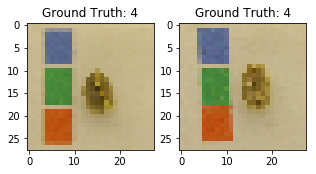

In [83]:
plt.figure(figsize = [5,5])

# primera imagen de training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap = 'gray')
plt.title('Ground Truth: {}'.format(train_Y[0]))

# primera imagen de training data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap = 'gray')
plt.title('Ground Truth: {}'.format(test_Y[0]))

In [84]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [85]:
train_X = train_X / 255.
test_X = test_X / 255.

**One-hot Encoding**

In [86]:
# cambio a categorico
train_Y_one_hot = to_categorical(train_Y)
test_y_one_hot = to_categorical(test_Y)

# verigicacion
print('Original label: ', train_Y[0])
print('After: ', train_Y_one_hot[0])

Original label:  4
After:  [0. 0. 0. 0. 1. 0. 0. 0.]


In [87]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y_one_hot, test_size = 0.2, random_state = 123)

In [88]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(696, 28, 28, 3) (175, 28, 28, 3) (696, 8) (175, 8)


### 5. Crear el modelo de la CNN

Se utilizo Keras dada su facilidad de uso. De multiples pruebas se decidio tomar los siguientes valores en los respectivos hiperparametros:

* Taza de aprendizaje de 0.005
* 100 Epocas
* Batch size de 64.
* Optimizador: Adagrad

La arquitectura elegida es de 6 capas convolucionales con multiples dropout para evitar el sobre entrenamiento y funciones de activacion relu, en la segunda parte se aplana y se crea una red neuronal densa de 32 neuronas en la primera capa con una salida softmax de 8 neuronas que corresponden a la salida del one hot encoding.

La arquitectura completa cuenta con 410,344 parametros a entrenar, con un tiempo estimado de 10 minutos, este tiempo se puede reducir si se entrena en la nube por ejemplo en el Colab de google.

In [89]:
# taza de aprendizaje
init_lr = 0.005
# iteraciones por conjnto de entrenamiento
epochs = 100
# cantidad de imagenes que se toman a la vez en memoria
batch_size = 64

In [90]:
model = Sequential()
model.add(Conv2D(16, kernel_size = [3, 3], padding = "same", activation = "relu", input_shape = (28, 28, 3)))
model.add(Conv2D(32, kernel_size = [3, 3], padding = "same", activation = "relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size = [3, 3]))
model.add(Conv2D(32, kernel_size = [3, 3], padding = "same", activation = "relu"))
model.add(Conv2D(64, kernel_size = [3, 3], padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = [3, 3]))
model.add(Conv2D(128, kernel_size = [3, 3], padding = "same", activation = "relu"))
model.add(Conv2D(256, kernel_size = [3, 3], padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = [3, 3]))
model.add(Dropout(0.5))
#model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation = "softmax"))

In [91]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)         

In [92]:
model.compile(loss = keras.losses.categorical_crossentropy, 
              optimizer = keras.optimizers.Adagrad(lr = init_lr, decay = init_lr / 100), 
              metrics = ['accuracy'])

### 6. Entrenamiento de la CNN

In [93]:
model_fit = model.fit(X_train, y_train, 
                      batch_size = batch_size,
                      epochs = epochs,
                      verbose = 1,
                      validation_data = (X_test, y_test))

Train on 696 samples, validate on 175 samples
Epoch 1/100
696/696 [==============================] - 6s 9ms/step - loss: 2.2116 - accuracy: 0.1394 - val_loss: 2.1159 - val_accuracy: 0.2114
Epoch 2/100
696/696 [==============================] - 4s 6ms/step - loss: 2.1029 - accuracy: 0.1595 - val_loss: 2.0853 - val_accuracy: 0.2114
Epoch 3/100
696/696 [==============================] - 3s 5ms/step - loss: 2.0370 - accuracy: 0.2299 - val_loss: 1.9053 - val_accuracy: 0.5314
Epoch 4/100
696/696 [==============================] - 3s 4ms/step - loss: 1.8552 - accuracy: 0.3032 - val_loss: 1.6751 - val_accuracy: 0.5257
Epoch 5/100
696/696 [==============================] - 3s 4ms/step - loss: 1.6294 - accuracy: 0.3851 - val_loss: 1.4495 - val_accuracy: 0.5657
Epoch 6/100
696/696 [==============================] - 3s 4ms/step - loss: 1.5577 - accuracy: 0.4282 - val_loss: 1.4160 - val_accuracy: 0.5657
Epoch 7/100
696/696 [==============================] - 3s 5ms/step - loss: 1.4506 - accuracy: 0.

696/696 [==============================] - 3s 4ms/step - loss: 0.7759 - accuracy: 0.7256 - val_loss: 0.8262 - val_accuracy: 0.7486
Epoch 58/100
696/696 [==============================] - 3s 5ms/step - loss: 0.7785 - accuracy: 0.7356 - val_loss: 0.7926 - val_accuracy: 0.7600
Epoch 59/100
696/696 [==============================] - 3s 5ms/step - loss: 0.7323 - accuracy: 0.7457 - val_loss: 0.7716 - val_accuracy: 0.7657
Epoch 60/100
696/696 [==============================] - 3s 4ms/step - loss: 0.7965 - accuracy: 0.7443 - val_loss: 0.8026 - val_accuracy: 0.8000
Epoch 61/100
696/696 [==============================] - 3s 5ms/step - loss: 0.7333 - accuracy: 0.7486 - val_loss: 0.8025 - val_accuracy: 0.7886
Epoch 62/100
696/696 [==============================] - 5s 7ms/step - loss: 0.7384 - accuracy: 0.7514 - val_loss: 0.7734 - val_accuracy: 0.7543
Epoch 63/100
696/696 [==============================] - 4s 6ms/step - loss: 0.7309 - accuracy: 0.7644 - val_loss: 0.7948 - val_accuracy: 0.8171
Epoch

In [94]:
# Guardar los pesos del modelo
model.save('model_fit_1.h5py')

In [95]:
#from keras.models import load_model
#model_fit = load_model('model_fit_1.h5py')
#model.summary()

### 7. Resultados

In [96]:
test_eval = model.evaluate(test_X, test_y_one_hot, verbose = 1)

218/218 [==============================] - 1s 6ms/step


In [97]:
print('Test loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])

Test loss:  0.630951723374358
Test accuracy:  0.8348624110221863


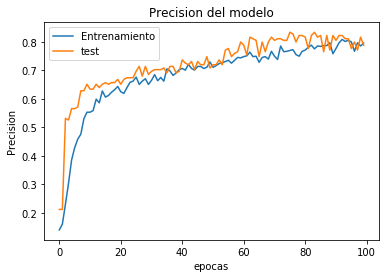

In [98]:
# hacemos las grafica 1 precision
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Precision del modelo')
plt.ylabel('Precision')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

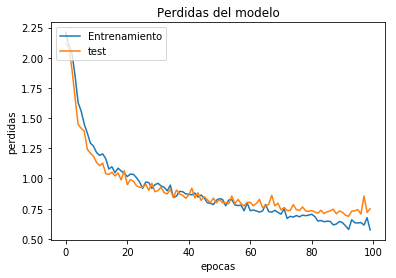

In [99]:
# hacemos las grafica 2 perdidas
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

In [100]:
# prediccion del conjunto test_X
predicted_classes2 = model.predict(test_X)

In [101]:
# lista para guardar las predicciones
predicted_classes = []
for predicted_s in predicted_classes2:
    predicted_classes.append(predicted_s.tolist().index(max(predicted_s)))
predicted_classes = np.array(predicted_classes)

In [102]:
# Predicciones
predicted_classes.shape, test_Y.shape

((218,), (218,))

**Verificacion de predicciones**

In [103]:
# verificacion de las predicciones correctas
correct = np.where(predicted_classes == test_Y)[0]
print('Se encontraron {} predicciones correctas'.format(len(correct)))

Se encontraron 182 predicciones correctas


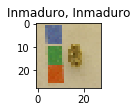

In [104]:
# grafico de predicciones correctas
for i, correct in enumerate(correct[0:1]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct], cmap = 'gray')
    plt.title('{}, {}'.format(cafes[predicted_classes[correct]],
                              cafes[test_Y[correct]]))
    plt.tight_layout()

En esta etapa se observa que se clasificaron bien 182 imagenes de un total de 218 imagenes de validacion, en el ejemplo se observa que un cafe Inmaduro fue efectivamente clasificado como Inmaduro.

In [107]:
# verificacion de las predicciones INcorrectas
incorrect = np.where(predicted_classes != test_Y)[0]
print('Se encontraron {} predicciones INcorrectas'.format(len(incorrect)))

Se encontraron 36 predicciones INcorrectas


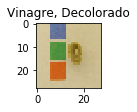

In [108]:
# grafico de predicciones INcorrectas
for i, incorrect in enumerate(incorrect[0:1]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect], cmap = 'gray')
    plt.title('{}, {}'.format(cafes[predicted_classes[incorrect]],
                              cafes[test_Y[incorrect]]))
    plt.tight_layout()

En esta etapa se observa que se clasificaron mal 36 imagenes de un total de 218 imagenes de validacion, en el ejemplo se observa que un cafe Decolorado fue mal clasificado como Vinagre.

In [109]:
# resumen de estadisticos
target_names = ['class {}'.format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.57      0.22      0.32        18
     class 1       0.58      0.54      0.56        13
     class 2       1.00      1.00      1.00        43
     class 3       0.95      0.77      0.85        53
     class 4       1.00      1.00      1.00        33
     class 5       0.68      0.92      0.78        25
     class 6       1.00      1.00      1.00        18
     class 7       0.46      0.87      0.60        15

   micro avg       0.83      0.83      0.83       218
   macro avg       0.78      0.79      0.76       218
weighted avg       0.85      0.83      0.83       218



El f1 score es de:  0.8296886522886359
El acc score es de:  0.8348623853211009
La precision es de:  0.8348623853211009
El f1 score es de:  0.8348623853211009


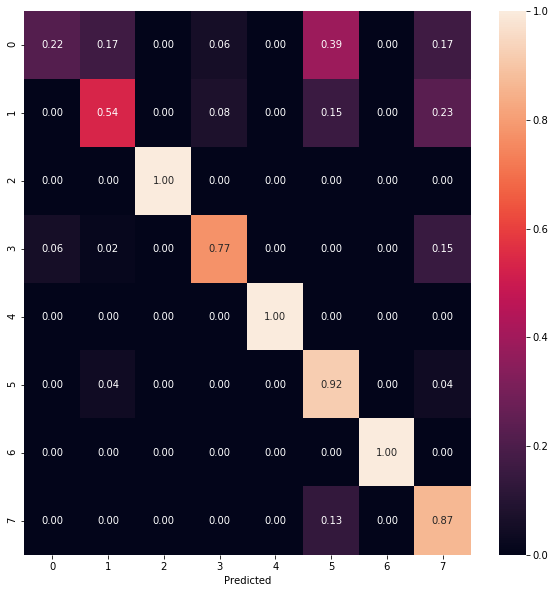

In [110]:
# Metricas
evaluate_model(test_Y, predicted_classes)
matconfision(test_Y, predicted_classes)

**Resultados**

1. De las graficas de perdida y precision no se observa aparente sobre ajuste, aunque incialmente se sospecha que hay sobreajuste por las pocas imagenes con las que se cuenta. 
2. Para validation secuenta con 218 imagenes, de las cuales 182 fueron bien predichas y 36 mal predichas.
3. Para la clase 0: Arrugados y la clase 1: Broca, el modelo CNN no se ajusta bien, esto se debe a las pocas imagenes con las que se cuenta.
4. El acc para validation es del 83.48%, este resultado debe de tomarse con cuidado ya que como se explica en el numeral 3 hay dos clases que no son pronosticadas bien, el acc es afectado por las categorias que tienen alta precision y por lo tanto este resultado puede y esta inflado.


## 2. Solucion Modelo ML

Se eligen dos modelos, el primero una regresion logistica LR y un random forest RF. De un analisis de diseño de experimento se obtiene que solo se necesitan tres caracteristicas, forma, defecto y color, por lo que solamente es necesario tener las imagenes en escala de grises. 

###  1. Importar librerías.

In [54]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

import seaborn as sns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
### FUNCIONES AUXILIARES

def evaluate_model(y_test, y_pred, model = None):
    """
    Aqui se pondran las cuatro metricas que se piden en el reporte
    debido a que cada modelo requiere las mismas metricas es probable que se pueda ejecutar el mismo para todas
    """
    f1 = print('El f1 score es de: ', f1_score(y_test, y_pred, average = 'weighted'))
    acc = print('El acc score es de: ', accuracy_score(y_test, y_pred))
    ps = print('La precision es de: ', precision_score(y_test, y_pred, average='micro'))
    re = print('El f1 score es de: ', recall_score(y_test, y_pred, average='micro'))
    
    return f1, acc, ps, re



def matconfision(y_test, y_pred):
    '''EN ESTA FUNCION ENTRAN LAS Y ORIGINALES Y LAS PREDICCIONES PARA CREAR UNA MATRIZ DE CONFUSION MAS BONITA'''
    
    cm = confusion_matrix(y_test, y_pred)
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    target_names = set(y)
    
    fig, ax = plt.subplots(figsize = (10,10))
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted')
    
    return plt.show(block=False)

###  2. Cargar las  imágenes a la memoria. (se uso PC)

Se realiza la lectura y carga a memoria de las imagenes solamente las imagenes originales, leidas en escala de grises, aplanadas y almacenadas en un dataframe. Este proceso es necesario realizarlo solo una 1 vez, ya que el dataframe se guardara automaticamente en la misma carpeta.

In [55]:
# se para en la carpeta sportimages
dirname = os.path.join(os.getcwd(), 'fotos3') 
imgpath = dirname + os.sep

db = []
images = []                  # lista para guardar las imagenes
directories = []             # lista de nombres de las carpetas donde estan las imagenes
dircount = []                # lista de imagenes por carpeta
prevRoot = ''
cant = 0                     # variable para contar imagenes

print('leyendo imagenes de ', imgpath)

for root, dirnames, filenames in os.walk(imgpath):                  # itera sobre lo que hay en sportimages 
    for filename in filenames:                                      # itera sobre la lista de los nombres de las carpetas de sportimages
        cant = cant + 1                                             # por cada objeto encontrado suma 1 a cant
        filepath = os.path.join(root, filename)                     # direccion de cada imagen
        gray = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)           # lee la imagen
        
        image = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_NEAREST)  ### re escalar
        image = image.flatten()
        db.append(image)
        
        #to = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)                              ### guardar
        #cv2.imwrite(filepath, to)                                                ### guardar
        
        images.append(image)                                        # guarda las imagenes en la lista images
        b = 'Leyendo...' + str(cant)                                # concatena palabra leyendo y numero de imagen
        print(b, end = '\r')                                        # imprime linea anterior
        if prevRoot != root:                                        # revisa si se leyeron todas las imagenes de la 
            print(root, cant)                                       # carpeta, para continuar la lectura de las imagenes 
            prevRoot = root                                         # de otra carpeta
            directories.append(root)
            dircount.append(cant)
            cant = 0
dircount.append(cant)
dircount = dircount[1:]
dircount[0] = dircount[0] + 1
print('Directorios leidos: ', len(directories))         
print('Imagenes en cada directorios', dircount)
print('Suma total de imagenes en subdirs', sum(dircount))
db = np.array(db)
db2 = pd.DataFrame(db)

leyendo imagenes de  C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos3\
C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos3\Arrugados 1
C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos3\Broca 70
C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos3\Buenos 90
C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos3\Decolorado 191
C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos3\Inmaduro 200
C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos3\Mordido 200
C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos3\Negro 123
C:\Users\SERGIOANDRES\Desktop\Actividad 1\Final\fotos3\Vinagre 101
Directorios leidos:  8
Imagenes en cada directorios [71, 90, 191, 200, 200, 123, 101, 113]
Suma total de imagenes en subdirs 1089


### 3. Crear dinámicamente las etiquetas de resultado. (etiquetado)

Se crean las etiquetas y se guardan en la lista labels, se le asigna un numero desde 0 a 7 por orden de lectura. Esto se realiza por ser un algoritmo supervisado.

    * Arrugados Etiqueta 0.
    * Broca Etiqueta 1.
    * Buenos Etiqueta 2.
    * Decolorados Etiqueta 3.
    * Inmaduro Etiqueta 4.
    * Mordido Etiqueta 5.
    * Negro Etiqueta 6.
    * Vinagre Etiqueta 7


In [56]:
# lista para guardar las etiquetas
labels = []
indice = 0
# itelador sobre la lista de cantidades de fotos 
for cantidad in dircount:
    for i in range(cantidad):                            # itera sore la cantidad de fotos por carpeta
        labels.append(indice)                            # etiqueta con 0 la primera carpeta con 1 la siguiente .....hasta 9
    indice = indice + 1                                  # incrementa el indice para cambiar de carpeta
print('Cantidad etiquetas creadas: ', len(labels))

Cantidad etiquetas creadas:  1089


In [57]:
clase = pd.DataFrame(labels)
clase.columns = ['Clase']
clase.head()

,Clase
0,0
1,0
2,0
3,0
4,0


### 4. Creacion del DataFrame donde se almacenan las imagenes.

Guardado de en un dataframe almacenado en csv, luego la lectura de este mismo.

In [58]:
fotos = pd.concat([db2, clase], axis = 1)
fotos.to_csv('fotos.csv', index = False)

In [59]:
fotos = pd.read_csv('fotos.csv', sep = ',', decimal = '.', header = 0)
fotos.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Clase
0,211,210,207,206,207,205,202,204,205,205,...,194,189,190,179,195,186,190,187,189,0
1,211,211,210,204,206,202,203,204,205,206,...,189,189,194,189,191,190,190,187,176,0
2,209,211,209,205,204,201,203,204,205,204,...,190,195,187,190,201,183,190,189,189,0
3,211,210,207,203,204,203,204,206,207,206,...,191,190,190,188,186,193,185,190,197,0
4,208,209,207,207,206,203,207,206,204,206,...,188,187,188,190,195,190,191,190,190,0


### 5. Dividir en sets de Entrenamiento y Test.

Se divide el dataset en 80-20 para entrenamiento y test respectivamente, y se re-escalan con la funcion StandardScaler() de sklearn para que el algoritmo sea mas eficiente.

In [64]:
y = fotos['Clase']
y.shape

(1089,)

In [65]:
X = fotos.copy()
X = X.drop('Clase', axis = 1)
X.shape

(1089, 784)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [67]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


### 6. Crear el modelo de ML

Se realizo el ajuste de dos modelos de ML, una Regresion Logistica LR que es un modelo clasico visto en clase, y un Random Forest RF. 

**Logistic Regression**

Se utiliza un threshold de 0.5 y el metodo uno contratodos ya que se cuenta con mas de dos clases.

In [68]:
clf_log = LogisticRegression(random_state = 123, solver = 'lbfgs', multi_class = 'multinomial')
clf_log.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=123, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

**Random Forest**

In [69]:
# AJUSTAR EL MODELO CON 2O ARBOLES
clasificador = RandomForestClassifier(n_estimators = 20, random_state = 123)
clasificador.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

### 7. Resultados. 

A continuacion, se imprimen unas metricas, sin embargo, la metrica que se tendra en cuenta es la matriz de confucion. 

**Logistic Regression**

El f1 score es de:  0.9768032188284316
El acc score es de:  0.9770642201834863
La precision es de:  0.9770642201834863
El f1 score es de:  0.9770642201834863


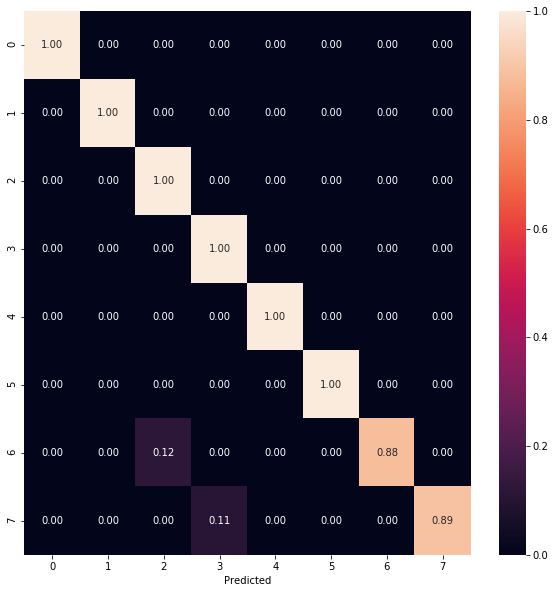

In [72]:
y_pred_LR = clf_log.predict(X_test)
evaluate_model(y_test, y_pred_LR)
matconfision(y_test, y_pred_LR)

**Random Forest**

El f1 score es de:  0.942504826298286
El acc score es de:  0.944954128440367
La precision es de:  0.944954128440367
El f1 score es de:  0.944954128440367


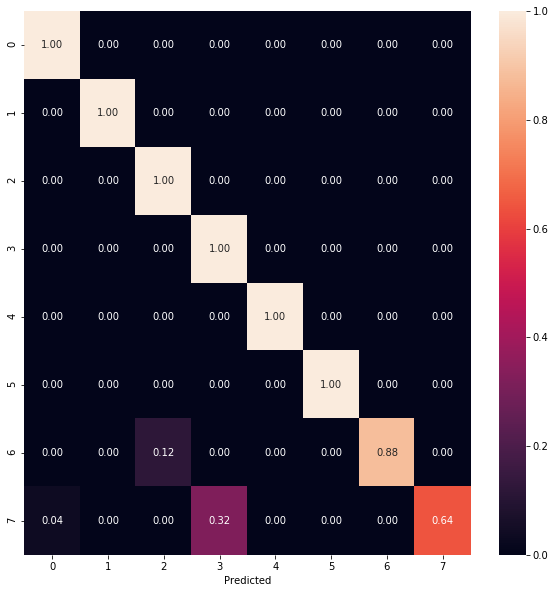

In [73]:
y_pred_RF = clasificador.predict(X_test)
evaluate_model(y_test, y_pred_RF)
matconfision(y_test, y_pred_RF)

De los modleos de ML ajustados se observa una superioridad de la Logistic Regression LR sobre el Random Forest, no solamente en las metricas numericas, tambien sobre la matriz de confusion en las cuales el RF tiene problemas para clasificar la clase 7, por lo tanto de estos dos modelos se elige el modelo LR

## 3. Comparacion y conclusion

Inicialmente se tiene que el modelo CNN tiene problemas ya que las redes neuronales son demandantes en imagenes por lo cual se sospecha que esta sobreajustada, la LR es un modelo no es demandante en muestras. Omitiendo esto, al comparar las metricas numericas el modelo LR tiene mejores metricas sobre el modelo CNN, la matriz de confusion es superior la LR sobre la matri de confusion del modelo CNN por ultimo el tiempo de ajuste de modelos el modelo CNN tarda aproximadamente 15 minutos ajustando en cambio el modelo LR tarda solo tarda 1 segundo, por estas razones se suguiere lo siguiente:

* Realizar un nuevo diseño de experimento.
* Aumentar las muestras, ya que estos modelos pueden ser potencializados con mayores y mejores imagenes.
* Se elige el modelo LR por tiempos y metricas.

Como proyecto futuro se podria utilizar la funcion VideoCapture de CV2 para capturar en tiempo real y clasificar inmediatamente las imagenes. 

<h3>**Notas:**</h3>
<h4>El codigo es inspirado en www.aprendemachinelearning.com y en la base de datos asl_alphabet_train</h4></div>

# Bibliografia

cafedecolombia. Defectos de Café Verde. Recuperado de: http://www.cafedecolombia.com/clientes/es/regulacion_nacional/exportadores/2831_calidades_de_exportacion/

cafesocialcoffee. (2013, Enero 2). Tillado Café Social en Pergamino y Selección en Mallas Números 18-17-16-15-14 y 13. [Archivo de video]. Recuperado de: https://www.youtube.com/watch?v=yeMeBAQGTUc

EFE.(2020). Brasil exportó 3,22 millones de sacos de café en enero, 7,2 % menos que 2019. diariolibre. Sao Paulo. Recuperado de: https://www.diariolibre.com/actualidad/internacional/brasil-exporto-322-millones-de-sacos-de-cafe-en-enero-72-menos-que-2019-GG17007076

Ly, k. 7 Defectos de Café Verde que Tostadores y Productores Deben Reconocer. Recuperado de: https://www.perfectdailygrind.com

Resolucion No. 02 de 2002. Comite Nacional de Cafeteros. Bogota, Colombia, 6 de Junio de 2002.

Sandoval, Z., (2005). Caracterización y clasificación de café cereza usando visión artificial (Tesis de maestría). Facultad de ingeniería y arquitectura, Universidad Nacional de Colombia. Manizales. Colombia.

Silvarolla, Maria B.; Mazzafera, Paulo; Fazuoli, Luiz C. (2004). «A naturally decaffeinated arabica coffee». Nature 429 (6994): 826. PMID 15215853. doi:10.1038/429826a.
Weinberg, Bennet Alan; Bealer, Bonnie K. (2001). The World of Caffeine: The Science and Culture of the World's Most Popular Drug. Nueva York: Routledge. ISBN 0-415-92722-6.

Vanegas, F. (2017). Estructura del fruto del café. [Figura]. Recuperado de https://www.yoamoelcafedecolombia.com/